# RETAIL SALES ANALYSIS & INSIGHTS

### Import necessary libraries

In [3]:
import pandas as pd
import os
import glob

### Combine the sales data from all months into a single consolidated CSV file

In [5]:
folder_path = r"C:\Monthly_Sales"

# Retrieve all CSV files from the folder using glob
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# All CSV files combined as one DataFrame 
all_data = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True)

# Merged DataFrame saved into a new CSV
output_file = os.path.join(folder_path, "all_data.csv")
all_data.to_csv(output_file, index=False)

print("All files integrated into:", output_file)

All files integrated into: C:\Monthly_Sales\all_data.csv


### Load the updated DataFrame

In [7]:
# Skip Blank Rows if present in the dataset

df = pd.read_csv(r'C:\Monthly_Sales\all_data.csv', skip_blank_lines=True)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
0,175667,iPhone,1,700.0,04/24/24 19:12,"135 Meadow St, Boston, MA 02215"
1,175668,AA Batteries (4-pack),1,5.84,04/20/24 13:45,"592 4th St, San Francisco, CA 94016"
2,175669,AA Batteries (4-pack),1,5.84,04/28/24 09:17,"632 Park St, Dallas, TX 75001"
3,175670,AA Batteries (4-pack),2,5.84,04/23/24 14:06,"131 Pine St, San Francisco, CA 94016"
4,175671,Samsung Odyssey Monitor,1,409.99,04/23/24 12:13,"836 Forest St, Boston, MA 02215"


In [8]:
df.shape

(9316676, 6)

## Data Cleaning Process

Thoroughly clean and standardize the data to eliminate errors, ensure consistency, and build a solid foundation for meaningful insights.

### Find and remove rows with NaN values

In [11]:
df.isna().sum()

Order ID            24192
Product Name        24192
Units Purchased     24194
Unit Price          24194
Order Date          24195
Delivery Address    24196
dtype: int64

In [12]:
# If Nan value is present in Order ID and Unit Purchased, it will be impossible to manipulate the data.
# Therefore, drop Nan values in Order ID and Units Purchased.

df.dropna(subset=['Order ID', 'Units Purchased'], inplace=True)

In [13]:
# Check if Nan value is present

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     0
Unit Price          0
Order Date          1
Delivery Address    2
dtype: int64

In [14]:
# Further check if any NaN values or blank rows are present

blank_rows_na = df[df.isnull().any(axis=1)]
blank_rows_na

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
2195228,Charging Cable,1,14.95,05/24/24 07:04,"852 Hickory St, San Francisco, CA 94016",NaN
3001506,150766,iPhone,1,7,NaN,NaN


#### Find and remove rows with duplicate values

In [16]:
# Find duplicate values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
9316671     True
9316672     True
9316673     True
9316674     True
9316675     True
Length: 9292482, dtype: bool

In [17]:
# Remove duplicated values

df.drop_duplicates(inplace = True)

In [18]:
# Check again for duplicated values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
172530     False
2195228    False
3001506    False
6370083    False
6403571    False
Length: 171546, dtype: bool

### Verify and fix incorrect data types in the dataset

In [20]:
# check for data types

df.dtypes

Order ID            object
Product Name        object
Units Purchased     object
Unit Price          object
Order Date          object
Delivery Address    object
dtype: object

#### Fix incorrect data types

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df['Units Purchased'] = pd. to_numeric(df['Units Purchased'], errors='coerce')

df['Unit Price'] = pd. to_numeric(df['Unit Price'], errors='coerce')

In [23]:
# Verify the presence of NaN values remaining in the columns as a result of using errors='coerce' during data conversion.

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     1
Unit Price          2
Order Date          3
Delivery Address    2
dtype: int64

In [24]:
df = df.dropna()

### Change the data type to optimize memory usage (Optional)

In [26]:
df['Order ID'] = pd.to_numeric(df['Order ID'], downcast='integer') 
df['Product Name'] = df['Product Name'].astype('category')  
df['Units Purchased'] = df['Units Purchased']. astype('int8') 
df['Unit Price'] = pd.to_numeric(df['Unit Price'], downcast='float')   
df['Delivery Address'] = df['Delivery Address'].astype('category') 

## Expand the dataset with supplementary columns

### Add month column

In [29]:
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4
...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10


In [30]:
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April
...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October


### Add week day column

In [32]:
df['Day of Week'] = df['Order Date'].dt.strftime('%a')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue
...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon


### Add hour column

In [34]:
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12
...,...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon,8
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed,22
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed,13
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon,16


### Add city column

In [36]:
def city(address):
    return address.split(",")[1].strip(" ")

def state_abbrev(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Delivery Address'].apply(lambda x: f"{city(x)}  ({state_abbrev(x)})")
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19,Boston (MA)
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13,San Francisco (CA)
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9,Dallas (TX)
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14,San Francisco (CA)
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12,Boston (MA)


### Organize Data by Order Date Chronologically and Reindex

In [38]:
df = df.sort_values(by = 'Order Date')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
78282,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
68761,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
64303,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
63092,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
74502,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
44457,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
30663,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
49246,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
30770,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


In [39]:
df = df.reset_index(drop=True)
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
1,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
2,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
3,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
4,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
171538,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
171539,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
171540,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
171541,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


# Exploration Data Analysis (EDA)

## 1. Monthly Sales Performance Analysis

### Which month achieved the highest total sales, and what was the total sales figure recorded during that period?


In [43]:
# Add Total Sales column

df['Total Sales'] = df['Units Purchased'] * df['Unit Price']
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.98999,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.98999
1,151041,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99000
2,146765,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99000
3,145617,Amana Washing Machine,1,600.00000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00000
4,156535,iPhone,1,700.00000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00000


#### Format Unit Price and Total Sales to 2 decimal places

In [45]:
df['Unit Price'] = df['Unit Price'].apply(lambda x: "%.2f" % x)

In [46]:
df['Total Sales'] = df['Total Sales'].apply(lambda x: "%.2f" % x)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00
4,156535,iPhone,1,700.00,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00


In [47]:
df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

In [48]:
df.dtypes

Order ID                     int32
Product Name              category
Units Purchased               int8
Unit Price                 float64
Order Date          datetime64[ns]
Delivery Address          category
Month                        int32
Month Name                  object
Day of Week                 object
Hour                         int32
City                        object
Total Sales                float64
dtype: object

In [49]:
monthly_sales = df.groupby('Month')['Total Sales'].sum() 
monthly_sales                                                                                                                    

Month
1     4639312.17
2     1235017.71
3     2358783.67
4     2619873.83
5     2657978.27
6     3408613.54
7     2990038.42
8     3143681.87
9     2368652.05
10    1760182.98
11    5743349.24
12    6404121.28
Name: Total Sales, dtype: float64

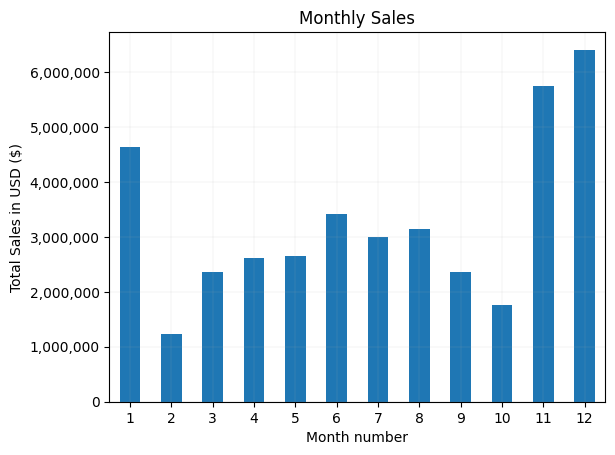

In [50]:
import matplotlib.pyplot as plt

ax = monthly_sales.plot(kind='bar', title="Monthly Sales")

ax.set_xlabel('Month number')
ax.set_ylabel('Total Sales in USD ($)')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=0)
plt.grid(linewidth=0.1)
plt.show()

## 2. Monthly Sales Growth Analysis

### What is the percentage growth in total monthly sales over time, and how does it vary across different months?

In [53]:
# Deep copy to avoid modifying the original DataFrame (df)
df_growth = df.copy(deep=True)

df_msg = df_growth.groupby('Month')['Total Sales'].sum().reset_index()

# Monthly Growth Rate (%)
df_msg['Growth Rate (%)'] = df_msg['Total Sales'].pct_change() * 100

df_msg

,Month,Total Sales,Growth Rate (%)
0,1,4639312.17,NaN
1,2,1235017.71,-73.379293
2,3,2358783.67,90.991890
3,4,2619873.83,11.068847
4,5,2657978.27,1.454438
5,6,3408613.54,28.240835
6,7,2990038.42,-12.279923
7,8,3143681.87,5.138511
8,9,2368652.05,-24.653570
9,10,1760182.98,-25.688411


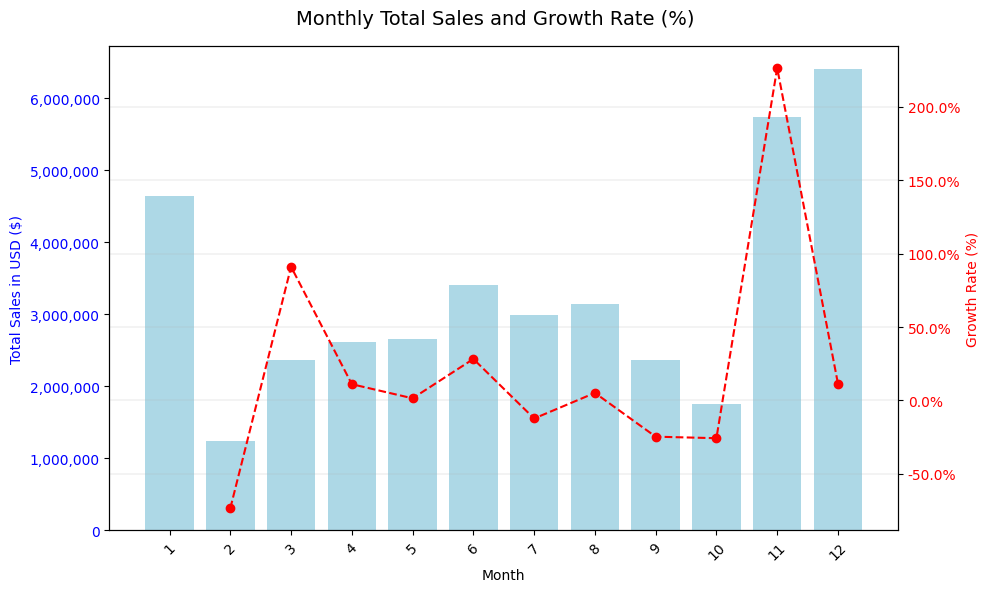

In [54]:
# Monthly Sales Growth Plot
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: Total Sales as bar chart
ax1.bar(df_msg['Month'].astype(str), df_msg['Total Sales'], color='lightblue', label='Total Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales in USD ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Numeric and not scientific
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Right y-axis: Growth Rate as line plot
ax2 = ax1.twinx()
ax2.plot(df_msg['Month'].astype(str), df_msg['Growth Rate (%)'], color='red', linestyle='--', marker='o', label='Growth Rate (%)')
ax2.set_ylabel('Growth Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.1f}%'))

fig.suptitle('Monthly Total Sales and Growth Rate (%)', fontsize=14)
fig.tight_layout()
plt.grid(True, linewidth=0.2)

plt.show()

## 3. Geographic Sales Analysis

###  Which city achieved the highest total sales, and what was the total sales amount for that city?

#### Replace 'Boston  (\rA)' with 'Boston  (MA)'

In [58]:
import re

df['City'] = df['City'].str.replace(r'Boston\s+\(\rA\)', 'Boston  (MA)', regex=True)

In [59]:
City_sales = df.groupby('City', observed=False)['Total Sales'].sum()
City_sales

City
Atlanta  (GA)          3145310.00
Austin  (TX)           2178728.99
Boston  (MA)           4166657.99
Dallas  (TX)           3193629.21
Los Angeles  (CA)      6343771.43
New York City  (NY)    5200781.23
Portland  (ME)          541531.52
Portland  (OR)         2053173.81
San Francisco  (CA)    9391881.93
Seattle  (WA)          3114138.92
Name: Total Sales, dtype: float64

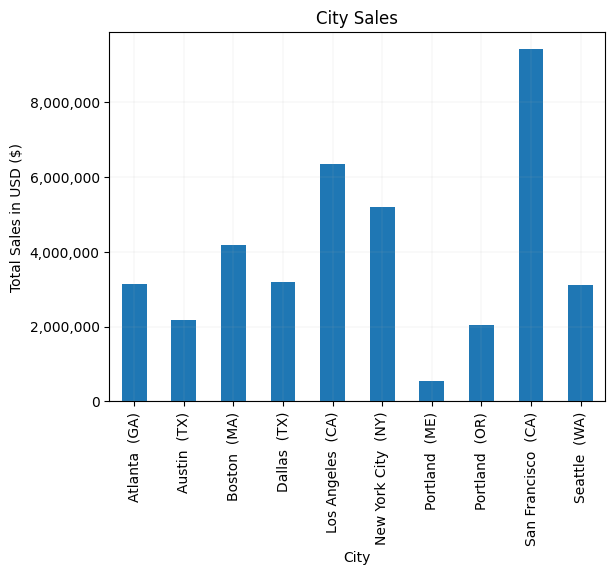

In [60]:
ax = City_sales.plot(kind='bar', title="City Sales")

ax.set_xlabel('City')
ax.set_ylabel('Total Sales in USD ($)')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(linewidth=0.1)
plt.show()

## 4. Product Analysis

###   Which product had the highest sales, and what factors do you believe contributed to its success?

In [63]:
product_df = df.groupby('Product Name', observed=False)['Units Purchased'].sum()

sorted_product_df = product_df.sort_values(ascending=False)
sorted_product_df

Product Name
AAA Batteries (4-pack)        23970
AA Batteries (4-pack)         22830
USB-C Charging Cable          21927
Lightning Charging Cable      21442
Galaxy buds Headphones        17384
Apple Airpods Headphones      14445
Bose SoundSport Headphones    12386
LG UltraGear Monitor           7096
iPhone                         6294
Dell UltraSharp Monitor        5820
Samsung Odyssey Monitor        5741
Google Phone                   5174
Flatscreen TV                  4422
Macbook Pro Laptop             4344
Alienware Monitor              3861
Dell Laptop                    3798
Samsung Galaxy Phone           1859
Amana Dryer                     622
Amana Washing Machine           611
Name: Units Purchased, dtype: int64

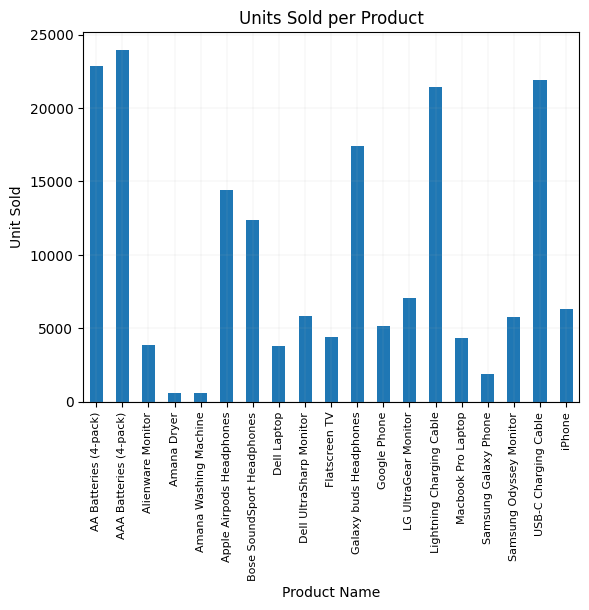

In [64]:
product_df = df.groupby('Product Name', observed=False)['Units Purchased'].sum()

product_df.plot(kind='bar', title="Units Sold per Product")

plt.xlabel('Product Name')
plt.ylabel('Unit Sold')
plt.xticks(rotation='vertical', size=8)
plt.grid(linewidth=0.1)
plt.show()

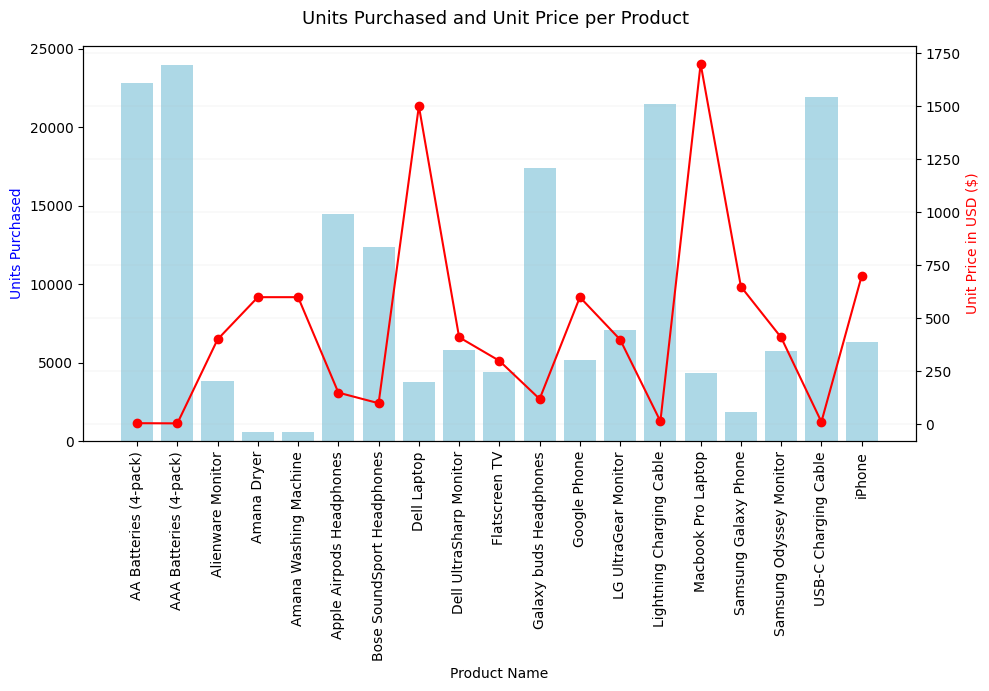

In [65]:
product_df = df.groupby('Product Name', observed=False)['Units Purchased'].sum()
price_df = df.groupby('Product Name', observed=False)['Unit Price'].mean()

# first axis and figure size
fig, ax1 = plt.subplots(figsize=(10, 7))

# Bar chart and first y-axis for Units Purchased
ax1.bar(product_df.index, product_df, color='lightblue', label='Units Purchased')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Units Purchased', color='b')
ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better visibility

# Line chart and the second y-axis for Unit Price
ax2 = ax1.twinx()
ax2.plot(price_df.index, price_df, color='r', label='Unit Price', marker='o')
ax2.set_ylabel('Unit Price in USD ($)', color='r')

plt.grid(linewidth=0.1)
fig.suptitle('Units Purchased and Unit Price per Product', fontsize=13)

plt.tight_layout()  
plt.show()

## 5. Product Sales Performance Analysis

###  How do product sales vary across different days of the week, and what insights can be drawn from the distribution of order volumes by product and day?


In [68]:
pivot_table = df.pivot_table(index = 'Product Name', columns = 'Day of Week' , values = 'Units Purchased', 
                             aggfunc = 'sum', observed=False )
pivot_table

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Product Name,,,,,,,
AA Batteries (4-pack),3262,3329,3368,3174,3205,3294,3198
AAA Batteries (4-pack),3347,3519,3448,3457,3362,3485,3352
Alienware Monitor,581,560,570,564,509,556,521
Amana Dryer,94,106,89,87,85,88,73
Amana Washing Machine,88,99,92,90,77,75,90
Apple Airpods Headphones,2053,2166,2000,2096,1985,2082,2063
Bose SoundSport Headphones,1729,1919,1768,1789,1695,1795,1691
Dell Laptop,537,564,560,546,516,541,534
Dell UltraSharp Monitor,827,807,814,898,806,860,808


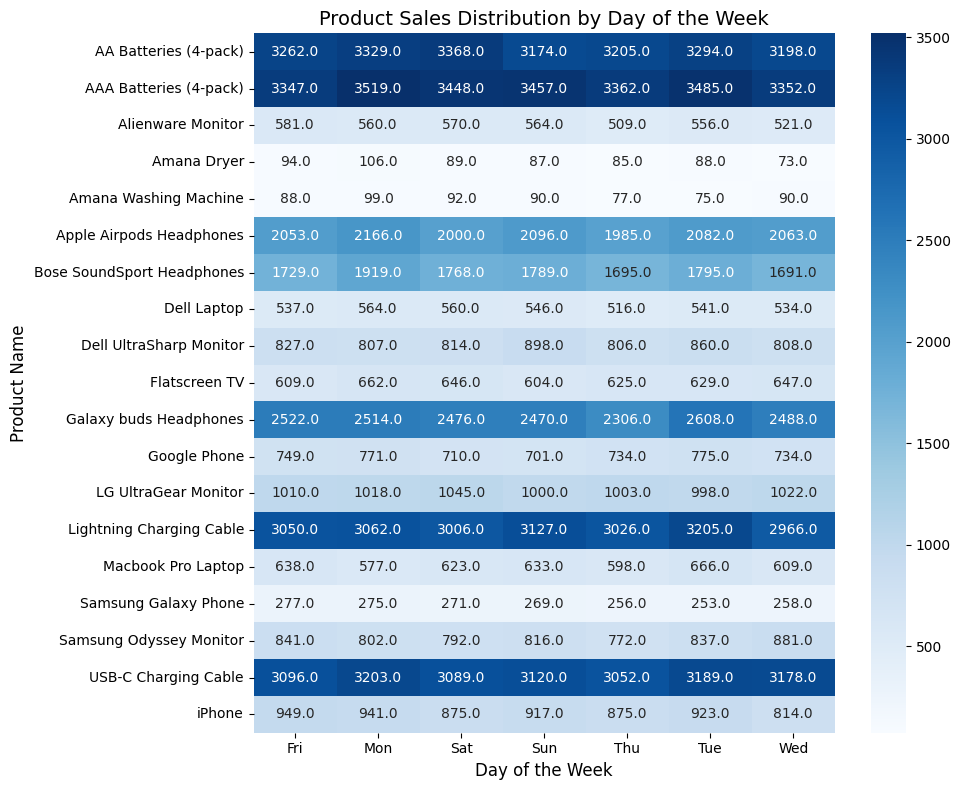

In [69]:
import seaborn as sns

plt.figure(figsize=(10, 8)) 
sns.heatmap(pivot_table, annot = True, cmap = 'Blues', fmt='.1f', annot_kws={'size': 10})

plt.title('Product Sales Distribution by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.tight_layout()
plt.show()

## 6. Weekly Purchase Trends Analysis 

### On which day of the week do customers make the most purchases?

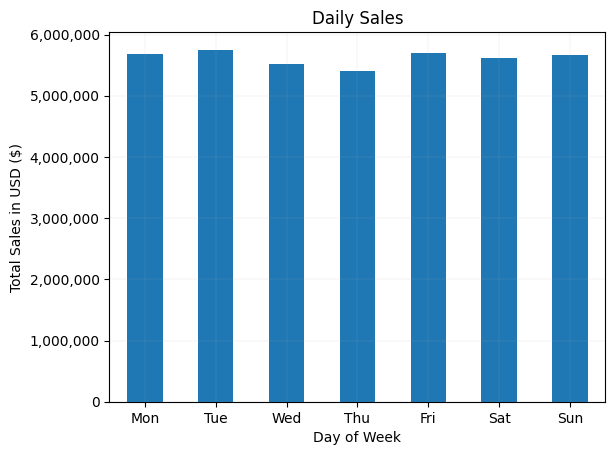

In [72]:
daily_sales = df.groupby('Day of Week', observed=False)['Total Sales'].sum().sort_values(ascending=False)
daily_sales

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

daily_sales = daily_sales.reindex(day_order)

ax = daily_sales.plot(kind='bar', title="Daily Sales")

ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Sales in USD ($)')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=0)
plt.grid(linewidth=0.1)
plt.show()

# Machine Learning Models

## 7. Time Series Analysis (Customer Behavior Timing)

###  What is the optimal timing for advertisements and promotions to maximize customer purchases, based on historical purchase behavior?

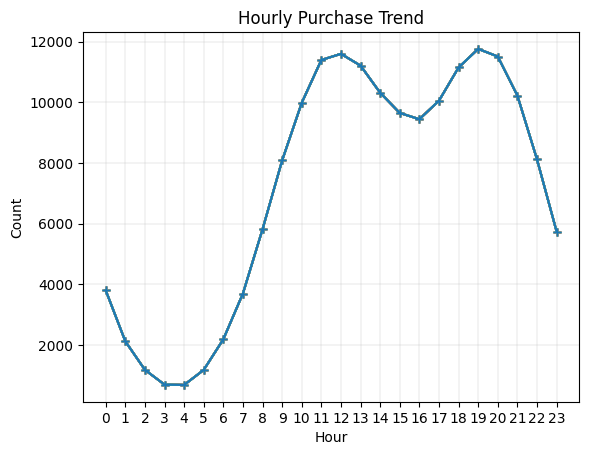

In [76]:
plt.plot(df.groupby(['Hour']).count(), marker='+')
plt.title('Hourly Purchase Trend')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(0,24))
plt.grid(linewidth=0.2)
plt.show()


## 8. Sales Forecasting

###  What will our monthly sales look like over the next two years based on historical purchasing patterns?

#### Using Linear Regression model

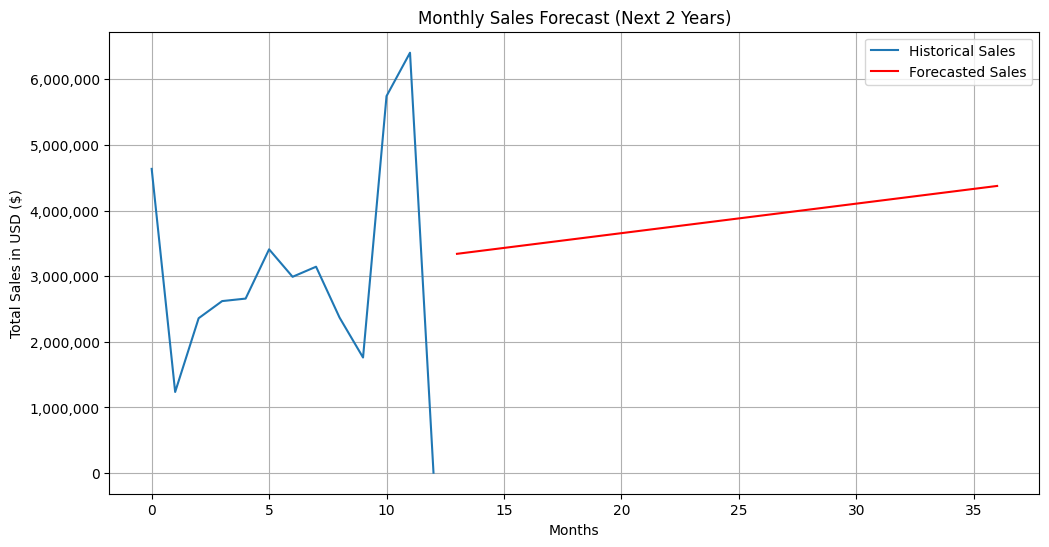

In [80]:
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Add Year column
df['Year'] = df['Order Date'].dt.year


monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Time Index' for regression (e.g., 0, 1, 2, ..., n)
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])
monthly_sales['Time'] = np.arange(len(monthly_sales))

# Linear Regression model
X = monthly_sales[['Time']]
y = monthly_sales['Total Sales']

model = LinearRegression()
model.fit(X, y)

# Forecast for next 24 months (2 years)
future_time = pd.DataFrame({'Time': np.arange(len(monthly_sales), len(monthly_sales) + 24)})
future_sales = model.predict(future_time)

# Future date labels
last_year = monthly_sales['Year'].max()
last_month = monthly_sales['Month'].max()
start_date = pd.Timestamp(year=last_year, month=last_month, day=1) + pd.DateOffset(months=1)
future_dates = pd.date_range(start=start_date, periods=24, freq='MS')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Time'], y, label='Historical Sales')
plt.plot(future_time, future_sales, label='Forecasted Sales', color='red')
plt.title('Monthly Sales Forecast (Next 2 Years)')
plt.xlabel('Months')
plt.ylabel('Total Sales in USD ($)')
plt.legend()
plt.grid(True)

# Format Y-axis to numeric (non-scientific)
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

#### Using Prophet Model

23:28:05 - cmdstanpy - INFO - Chain [1] start processing
23:28:09 - cmdstanpy - INFO - Chain [1] done processing


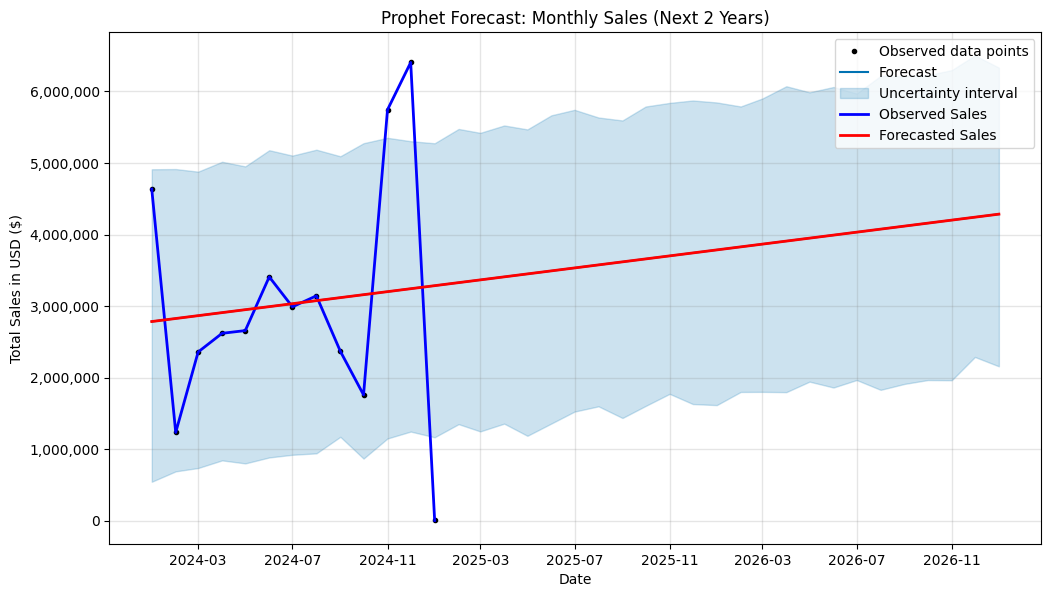

,ds,yhat,yhat_lower,yhat_upper
13,2025-02-01,3.327913e+06,1.350554e+06,5.475150e+06
14,2025-03-01,3.366248e+06,1.249063e+06,5.420682e+06
15,2025-04-01,3.408691e+06,1.357595e+06,5.523899e+06
16,2025-05-01,3.449764e+06,1.187470e+06,5.468978e+06
17,2025-06-01,3.492207e+06,1.359289e+06,5.665686e+06
18,2025-07-01,3.533281e+06,1.526009e+06,5.742422e+06
19,2025-08-01,3.575724e+06,1.599527e+06,5.635174e+06
20,2025-09-01,3.618167e+06,1.436391e+06,5.593912e+06
21,2025-10-01,3.659240e+06,1.604829e+06,5.788730e+06
22,2025-11-01,3.701683e+06,1.773881e+06,5.839067e+06


In [82]:
from prophet import Prophet

# Deep copy to avoid modifying the original DataFrame (df)
df_prophet = df.copy(deep=True)

# Data preparation
monthly_sales = df_prophet.resample('MS', on='Order Date')['Total Sales'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(monthly_sales)

# Forecast for next 24 months (2 years)
future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)

# Connect observed data points (historical sales)  
plt.plot(monthly_sales['ds'], monthly_sales['y'], color='blue', linewidth=2, label='Observed Sales')

# Overlay forecast line
plt.plot(forecast['ds'], forecast['yhat'], color='red', linewidth=2, label='Forecasted Sales')

plt.title('Prophet Forecast: Monthly Sales (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Total Sales in USD ($)')
plt.grid(True)

# Format Y-axis to numeric (non-scientific)
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.show()

# Forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

## 9. Market Basket Analysis (Customer Purchase Behavior)

###  What products are frequently bought together?

In [85]:
# Filter rows with the same Order ID and add .copy() to avoid settingwithcopyWarning
df2 = df[df['Order ID'].duplicated(keep=False)].copy()

# Group Product Name with same Order ID
df2['Grouped'] = df2.groupby('Order ID')['Product Name'].transform(lambda x: ','.join(x))

# Drop any duplicates that may occur as a result of the grouping
df3 = df2[['Order ID', 'Grouped']].drop_duplicates()

df3.head(10)

,Order ID,Grouped
4,156535,"iPhone,Lightning Charging Cable"
23,158949,"iPhone,Lightning Charging Cable"
37,144817,"AA Batteries (4-pack),Alienware Monitor"
44,157783,"Alienware Monitor,AA Batteries (4-pack)"
56,149918,"Alienware Monitor,Apple Airpods Headphones"
63,149417,"Dell Laptop,AA Batteries (4-pack)"
65,144372,"USB-C Charging Cable,Samsung Galaxy Phone"
120,141576,"Apple Airpods Headphones,Bose SoundSport Headp..."
205,143501,"Alienware Monitor,Bose SoundSport Headphones"
234,160332,"Google Phone,USB-C Charging Cable"


In [86]:
# Top 20 product pairs most frequently ordered together
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

top_combinations = count.most_common(20)

top_combinations

[(('iPhone', 'Lightning Charging Cable'), 473),
 (('USB-C Charging Cable', 'Google Phone'), 469),
 (('Google Phone', 'USB-C Charging Cable'), 465),
 (('Lightning Charging Cable', 'iPhone'), 443),
 (('iPhone', 'Galaxy buds Headphones'), 240),
 (('Galaxy buds Headphones', 'iPhone'), 216),
 (('Google Phone', 'Galaxy buds Headphones'), 195),
 (('Galaxy buds Headphones', 'Google Phone'), 178),
 (('Samsung Galaxy Phone', 'USB-C Charging Cable'), 177),
 (('iPhone', 'Apple Airpods Headphones'), 173),
 (('USB-C Charging Cable', 'Samsung Galaxy Phone'), 168),
 (('Apple Airpods Headphones', 'iPhone'), 147),
 (('Bose SoundSport Headphones', 'Google Phone'), 111),
 (('Google Phone', 'Bose SoundSport Headphones'), 94),
 (('USB-C Charging Cable', 'Galaxy buds Headphones'), 86),
 (('Galaxy buds Headphones', 'USB-C Charging Cable'), 82),
 (('Galaxy buds Headphones', 'Samsung Galaxy Phone'), 69),
 (('Lightning Charging Cable', 'Galaxy buds Headphones'), 66),
 (('Galaxy buds Headphones', 'Lightning Charg

In [87]:
# Top 10 sets of three (3) products most commonly ordered together
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

# Collect top 10 most common combinations
top_combinations = count.most_common(10)

# Display results
top_combinations

[(('Google Phone', 'USB-C Charging Cable', 'Galaxy buds Headphones'), 22),
 (('iPhone', 'Lightning Charging Cable', 'Galaxy buds Headphones'), 17),
 (('Galaxy buds Headphones', 'USB-C Charging Cable', 'Google Phone'), 17),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 15),
 (('Galaxy buds Headphones', 'Lightning Charging Cable', 'iPhone'), 11),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 10),
 (('Lightning Charging Cable', 'iPhone', 'Galaxy buds Headphones'), 10),
 (('iPhone', 'Galaxy buds Headphones', 'Lightning Charging Cable'), 10),
 (('USB-C Charging Cable', 'Google Phone', 'Galaxy buds Headphones'), 9),
 (('Bose SoundSport Headphones', 'USB-C Charging Cable', 'Google Phone'), 9)]

## 10. Clustering Cities Using the KMeans Model

###  How can we group cities based on sales performance to uncover patterns for better sales strategy?

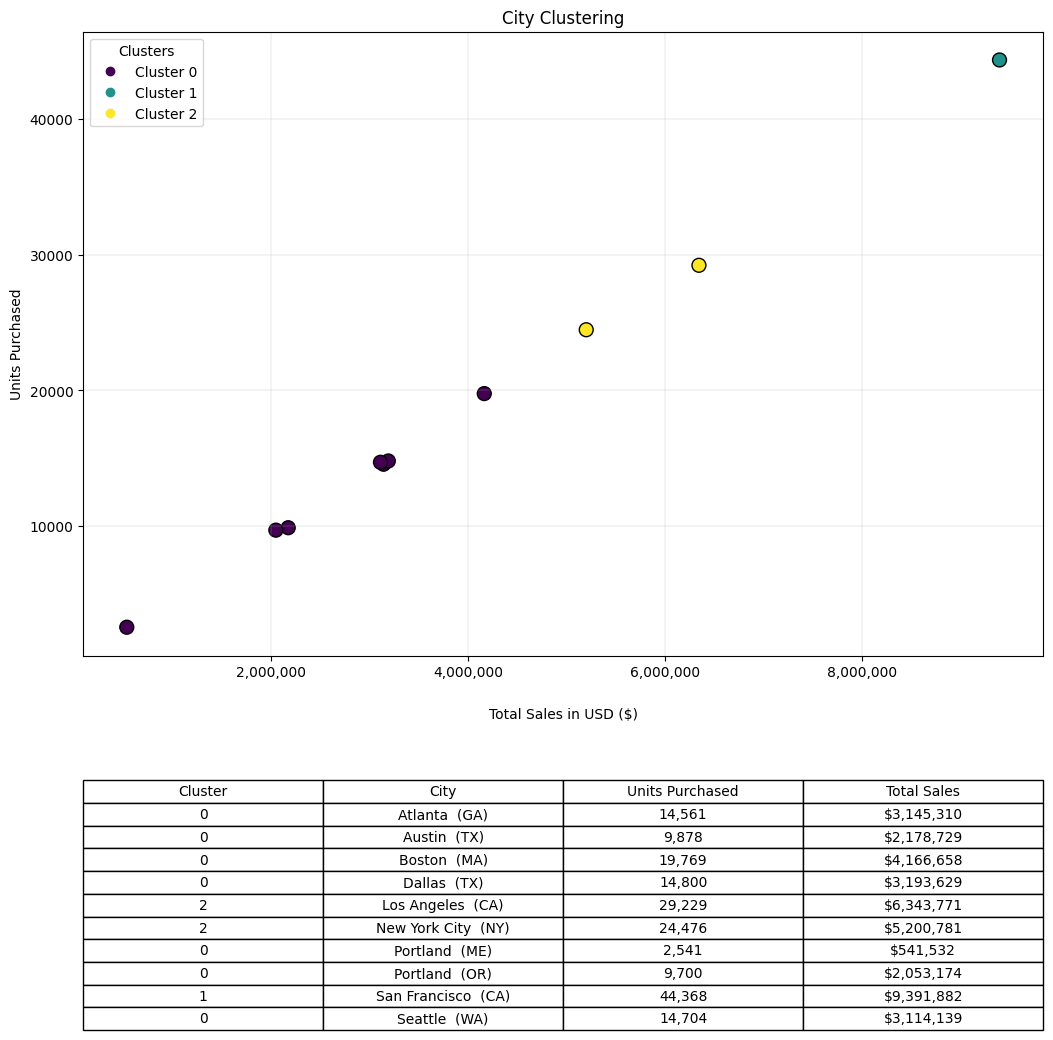

In [90]:
from sklearn.cluster import KMeans

# Deep copy to avoid modifying the original DataFrame
df_cluster = df.copy(deep=True)

# Cluster Cities based on total sales
city_sales_data = df_cluster.groupby('City').agg({'Total Sales': 'sum','Units Purchased': 'sum'}).reset_index()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
city_sales_data['Cluster'] = kmeans.fit_predict(city_sales_data[['Total Sales', 'Units Purchased']])

fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
df_scatter = ax.scatter(
    city_sales_data['Total Sales'],
    city_sales_data['Units Purchased'],
    c=city_sales_data['Cluster'],
    cmap='viridis',
    s=100,
    edgecolor='black'
)

# Axis labels and formatting
ax.set_xlabel('Total Sales in USD ($)', labelpad=20)    
ax.set_ylabel('Units Purchased')
ax.set_title('City Clustering')
ax.grid(linewidth=0.2)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Legend
handles, _ = df_scatter.legend_elements()
ax.legend(handles, [f'Cluster {i}' for i in range(len(handles))], title='Clusters')

# Prepare table data
table_data = city_sales_data[['Cluster', 'City', 'Units Purchased', 'Total Sales']].copy()
table_data['Units Purchased'] = table_data['Units Purchased'].apply(lambda x: f'{x:,.0f}')
table_data['Total Sales'] = table_data['Total Sales'].apply(lambda x: f'${x:,.0f}')

cell_text = table_data.values.tolist()
columns = table_data.columns.tolist()

table = plt.table(
    cellText=cell_text,
    colLabels=columns,
    loc='bottom',
    cellLoc='center',
    bbox=[0.0, -0.6, 1, 0.4]  # Lowered the table further
)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.subplots_adjust(left=0.1, bottom=0.10) 
plt.show()